## 1. Import Libraries

In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import eda_helper_functions

from sklearn.ensemble import IsolationForest

## 2. Read The Training Data

In [2]:
file_path  =  r"C:\Users\sneha\DADB\Flight-prediction-sagemaker\data\train.csv"

train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Spicejet,2019-05-15,Kolkata,Banglore,15:55:00,21:25:00,330,1.0,No Info,7804
1,Jet Airways,2019-05-18,Delhi,Cochin,13:25:00,12:35:00,1390,2.0,No Info,15129
2,Indigo,2019-06-06,Delhi,Cochin,23:30:00,04:35:00,305,1.0,No Info,10112
3,Jet Airways,2019-05-01,Kolkata,Banglore,14:05:00,08:15:00,1090,1.0,In-flight meal not included,8586
4,Jet Airways,2019-04-06,Banglore,Delhi,07:10:00,10:10:00,180,0.0,In-flight meal not included,4544
...,...,...,...,...,...,...,...,...,...,...
635,Indigo,2019-03-03,Delhi,Cochin,05:05:00,10:05:00,300,1.0,No Info,9581
636,Indigo,2019-06-27,Kolkata,Banglore,15:15:00,17:45:00,150,0.0,No Info,4804
637,Jet Airways,2019-05-18,Kolkata,Banglore,20:00:00,09:20:00,800,1.0,In-flight meal not included,10844
638,Vistara,2019-04-15,Banglore,Delhi,17:00:00,19:35:00,155,0.0,No Info,5613


In [3]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [4]:
train  = train.assign(**{
    col : pd.to_datetime(train.loc[:,col],dayfirst = True,format = "mixed")
    for col in ["date_of_journey", "dep_time", "arrival_time"]
})

train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [5]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Spicejet,2019-05-15,Kolkata,Banglore,2024-08-12 15:55:00,2024-08-12 21:25:00,330,1.0,No Info,7804
1,Jet Airways,2019-05-18,Delhi,Cochin,2024-08-12 13:25:00,2024-08-12 12:35:00,1390,2.0,No Info,15129
2,Indigo,2019-06-06,Delhi,Cochin,2024-08-12 23:30:00,2024-08-12 04:35:00,305,1.0,No Info,10112
3,Jet Airways,2019-05-01,Kolkata,Banglore,2024-08-12 14:05:00,2024-08-12 08:15:00,1090,1.0,In-flight meal not included,8586
4,Jet Airways,2019-04-06,Banglore,Delhi,2024-08-12 07:10:00,2024-08-12 10:10:00,180,0.0,In-flight meal not included,4544
...,...,...,...,...,...,...,...,...,...,...
635,Indigo,2019-03-03,Delhi,Cochin,2024-08-12 05:05:00,2024-08-12 10:05:00,300,1.0,No Info,9581
636,Indigo,2019-06-27,Kolkata,Banglore,2024-08-12 15:15:00,2024-08-12 17:45:00,150,0.0,No Info,4804
637,Jet Airways,2019-05-18,Kolkata,Banglore,2024-08-12 20:00:00,2024-08-12 09:20:00,800,1.0,In-flight meal not included,10844
638,Vistara,2019-04-15,Banglore,Delhi,2024-08-12 17:00:00,2024-08-12 19:35:00,155,0.0,No Info,5613


## 3. High-level Summary of Data

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [7]:
train.describe(include = "number")

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,602.960938,0.768750,8713.898438
std,483.032388,0.644921,4427.309147
min,75.000000,0.000000,1965.000000
25%,170.000000,0.000000,5073.000000
50%,482.500000,1.000000,7780.500000
75%,876.250000,1.000000,11622.000000
max,2280.000000,3.000000,27992.000000


In [8]:
(
    train
    .assign(total_stops = train["total_stops"].astype(object))
    .describe(include="O")
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,8,5,6,4.0,5
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,218,262,262,343.0,508


## 4. High Level Analysis

In [9]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


## 5. High Level analysis of Outliers

In [10]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [11]:
(
    train
	.assign(outlier=forest.fit_predict(
		train
		.drop(columns="price")
		.select_dtypes(include="number")
	))
	.query("outlier == -1")
	# .duration
	# .describe()
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
1,Jet Airways,2019-05-18,Delhi,Cochin,2024-08-12 13:25:00,2024-08-12 12:35:00,1390,2.0,No Info,15129,-1
3,Jet Airways,2019-05-01,Kolkata,Banglore,2024-08-12 14:05:00,2024-08-12 08:15:00,1090,1.0,In-flight meal not included,8586,-1
7,Jet Airways,2019-03-06,Mumbai,Hyderabad,2024-08-12 07:10:00,2024-08-12 08:35:00,85,0.0,No Info,9536,-1
9,Jet Airways,2019-06-09,Delhi,Cochin,2024-08-12 11:40:00,2024-08-12 19:00:00,440,2.0,In-flight meal not included,15812,-1
14,Air India,2019-03-21,Mumbai,Hyderabad,2024-08-12 19:30:00,2024-08-12 20:45:00,75,0.0,No Info,2575,-1
...,...,...,...,...,...,...,...,...,...,...,...
630,Indigo,2019-05-15,Kolkata,Banglore,2024-08-12 08:10:00,2024-08-12 13:00:00,290,1.0,No Info,5069,-1
631,Jet Airways,2019-06-03,Delhi,Cochin,2024-08-12 11:40:00,2024-08-12 19:00:00,440,2.0,No Info,18804,-1
632,Air Asia,2019-06-12,Kolkata,Banglore,2024-08-12 06:50:00,2024-08-12 10:30:00,220,1.0,No Info,5162,-1
633,Air India,2019-03-21,Chennai,Kolkata,2024-08-12 11:40:00,2024-08-12 13:55:00,135,0.0,No Info,3670,-1


## 6. Pair Plots

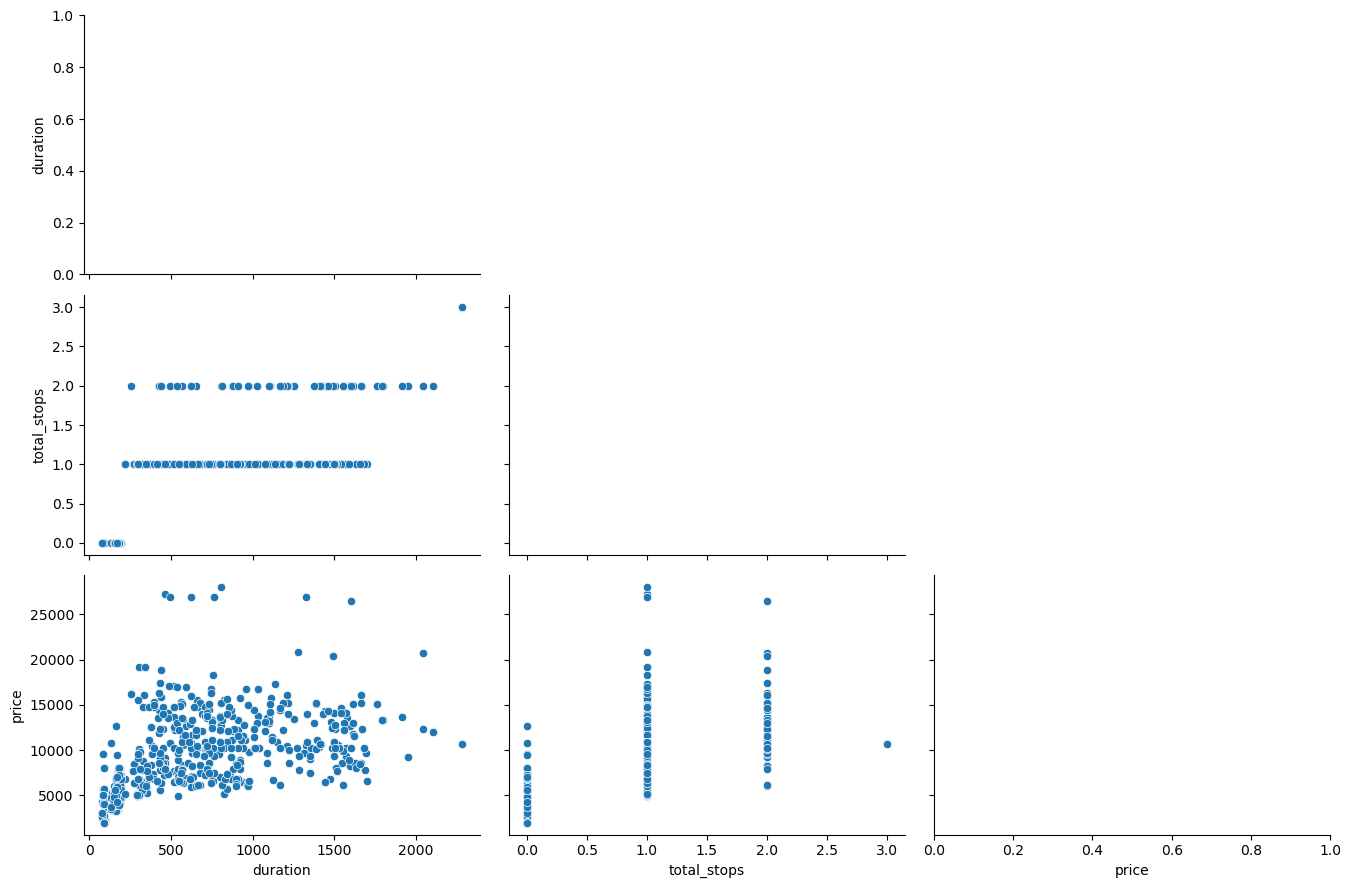

In [12]:
eda_helper_functions.pair_plots(train)

## 7. Correlation Analysis

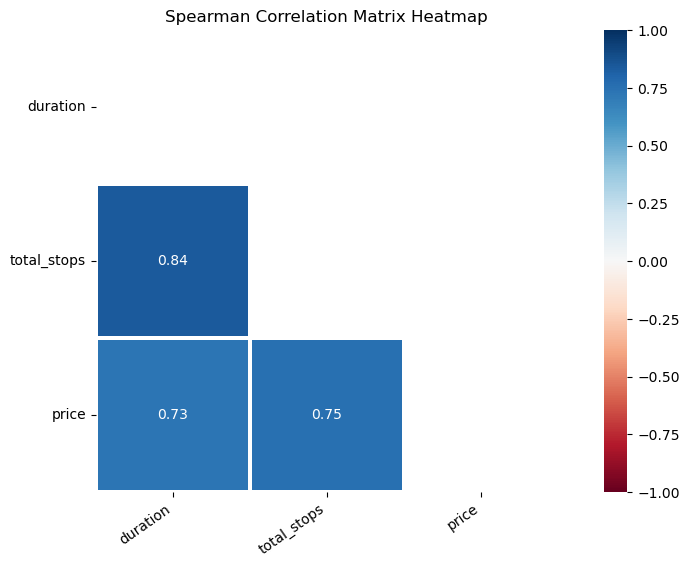

In [13]:
eda_helper_functions.correlation_heatmap(train)

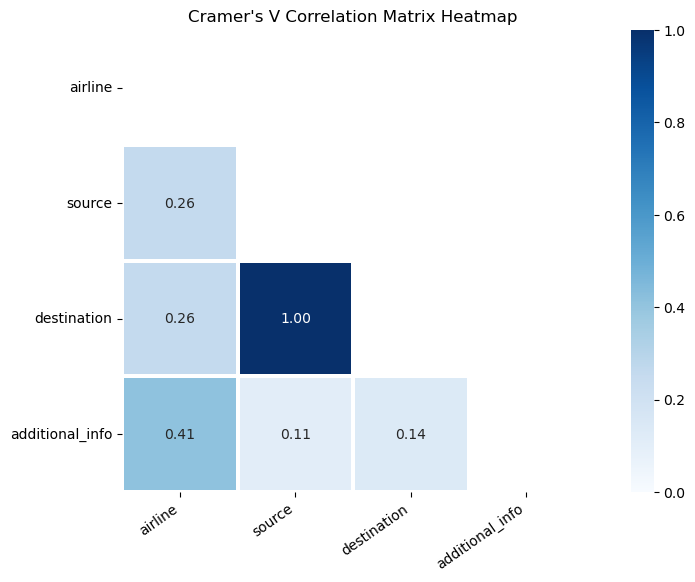

In [14]:
eda_helper_functions.cramersV_heatmap(train)

In [15]:
train.describe(include= "O")

,airline,source,destination,additional_info
count,640,640,640,640
unique,8,5,6,5
top,Jet Airways,Delhi,Cochin,No Info
freq,218,262,262,508


## 8. Detailed Analysis

In [16]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

## 8.1 airline

In [17]:
train.airline

0         Spicejet
1      Jet Airways
2           Indigo
3      Jet Airways
4      Jet Airways
          ...     
635         Indigo
636         Indigo
637    Jet Airways
638        Vistara
639         Indigo
Name: airline, Length: 640, dtype: object

In [18]:
eda_helper_functions.cat_summary(train, "airline")

0         Spicejet
1      Jet Airways
2           Indigo
3      Jet Airways
4      Jet Airways
          ...     
635         Indigo
636         Indigo
637    Jet Airways
638        Vistara
639         Indigo
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,8
top,Jet Airways
freq,218


,count,percentage
category,,
Jet Airways,218,0.340625
Indigo,133,0.207813
Air India,114,0.178125
Multiple Carriers,72,0.112500
Spicejet,42,0.065625
Vistara,27,0.042188
Goair,18,0.028125
Air Asia,16,0.025000


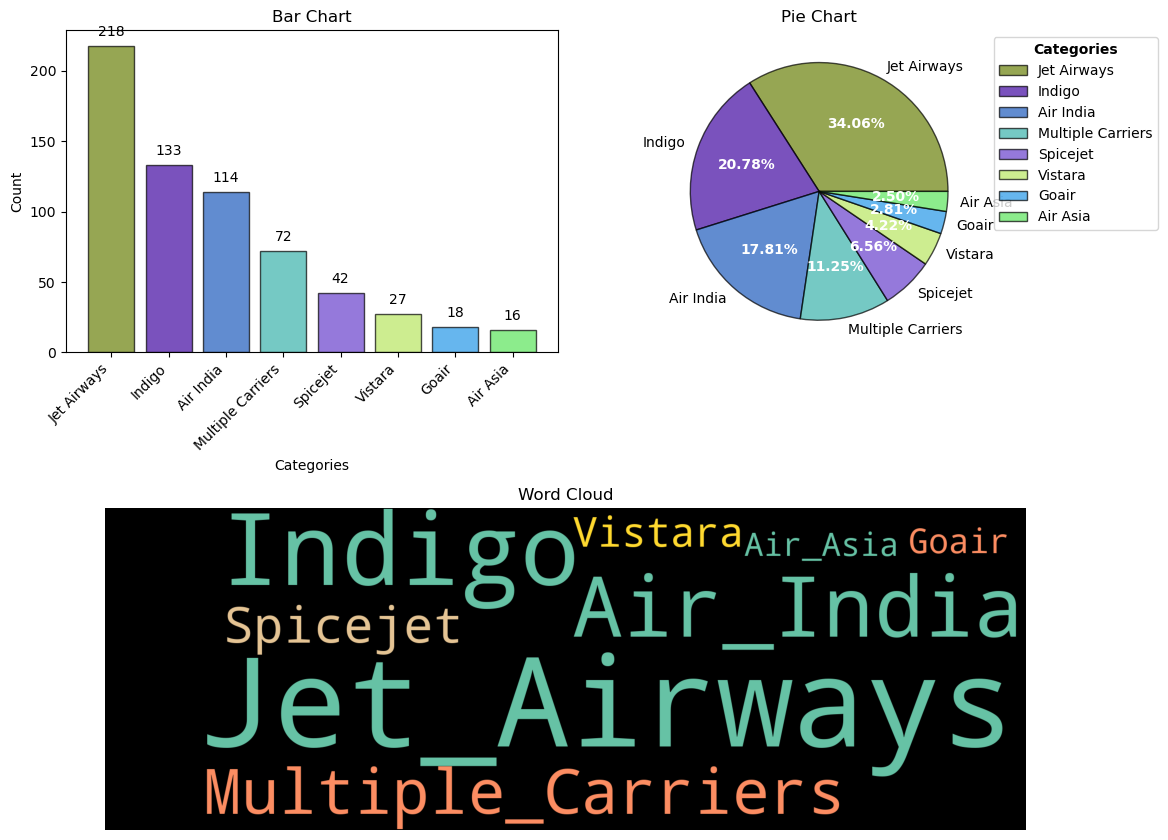

In [19]:
eda_helper_functions.cat_univar_plots(train, "airline")

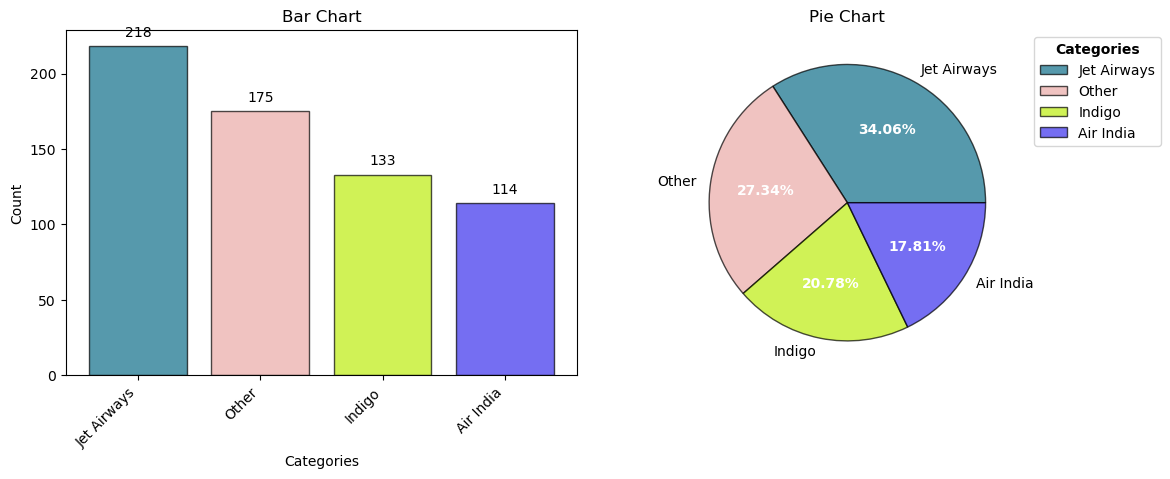

In [20]:
eda_helper_functions.cat_univar_plots(train, "airline", show_wordcloud=False, k=3)

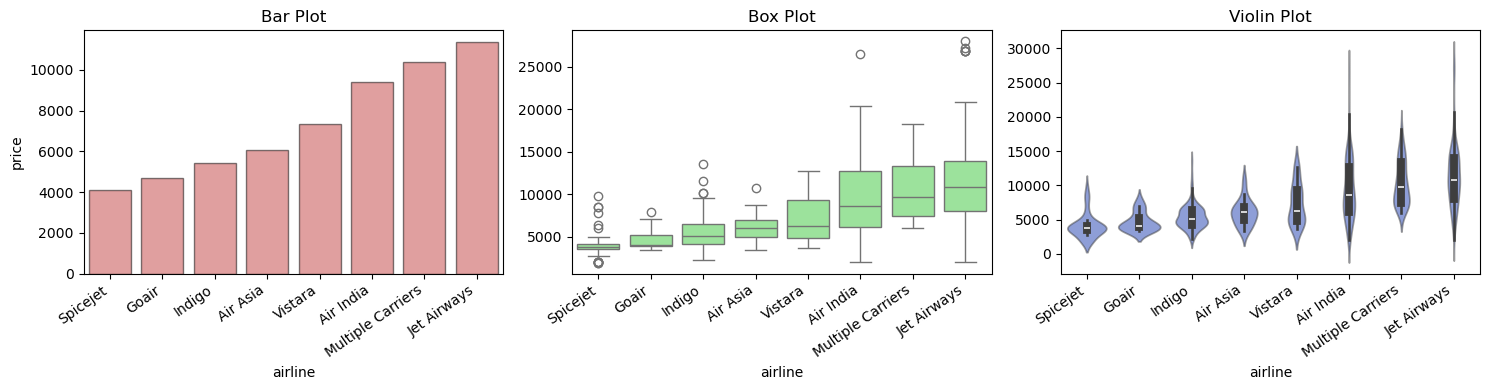

In [21]:
eda_helper_functions.num_cat_bivar_plots(
	data=train,
	num_var="price",
	cat_var="airline"
)

In [22]:

eda_helper_functions.num_cat_hyp_testing(train, "price", "airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 52.003241405680875
- p-value              : 1.660569481488521e-58
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 291.8293627779723
- p-value              : 3.3587961027213322e-59
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


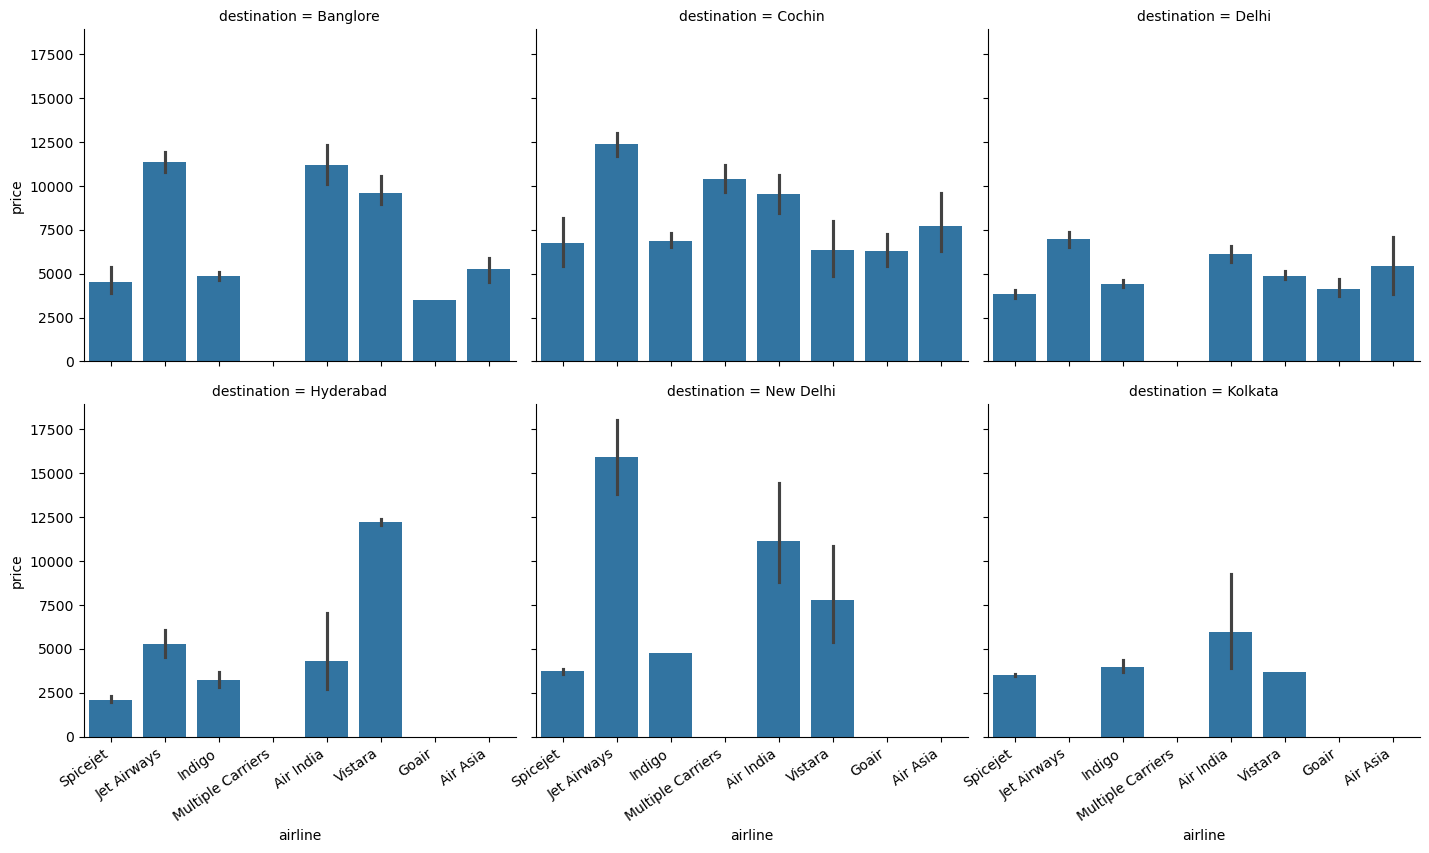

In [23]:
airline_grid = sns.FacetGrid(
	data=train,
	col="destination",
	col_wrap=3,
	height=4,
	aspect=1.2,
	sharey=True
)

airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())

for ax in airline_grid.axes[3:]:
	eda_helper_functions.rotate_xlabels(ax)
    

## 8.2 date_of_journey

In [24]:
train.date_of_journey

0     2019-05-15
1     2019-05-18
2     2019-06-06
3     2019-05-01
4     2019-04-06
         ...    
635   2019-03-03
636   2019-06-27
637   2019-05-18
638   2019-04-15
639   2019-05-12
Name: date_of_journey, Length: 640, dtype: datetime64[ns]

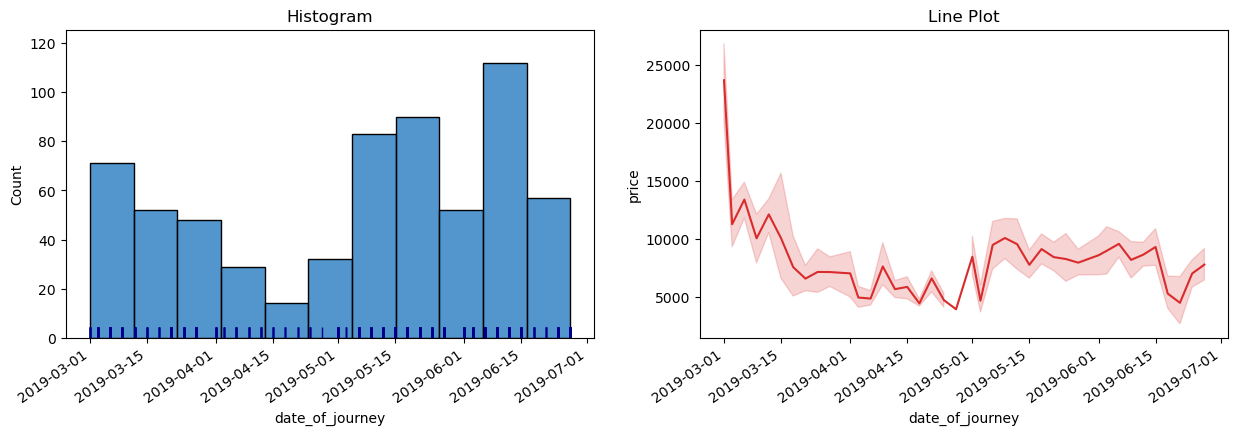

In [25]:
eda_helper_functions.dt_univar_plots(
	data=train,
	var="date_of_journey",
	target="price"
)

<Axes: xlabel='month'>

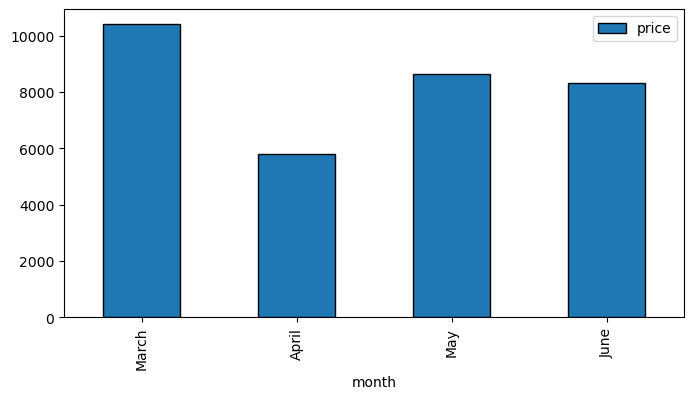

In [26]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="M"))
	.price.mean()
	.to_frame()
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

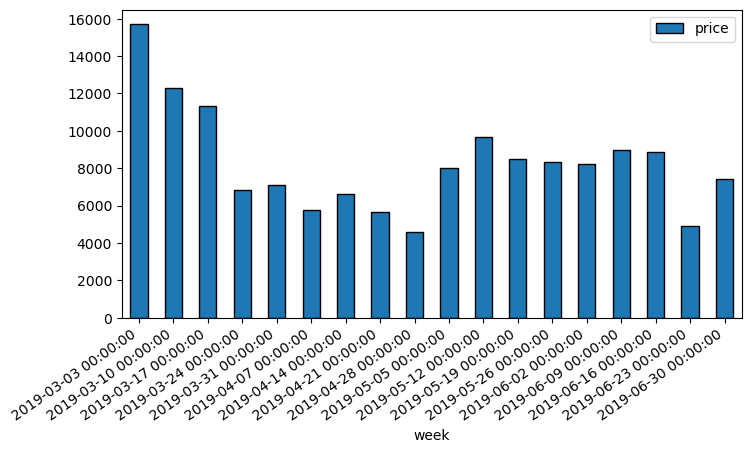

In [27]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="W"))
	.price.mean()
	.to_frame()
	.rename_axis(index="week")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

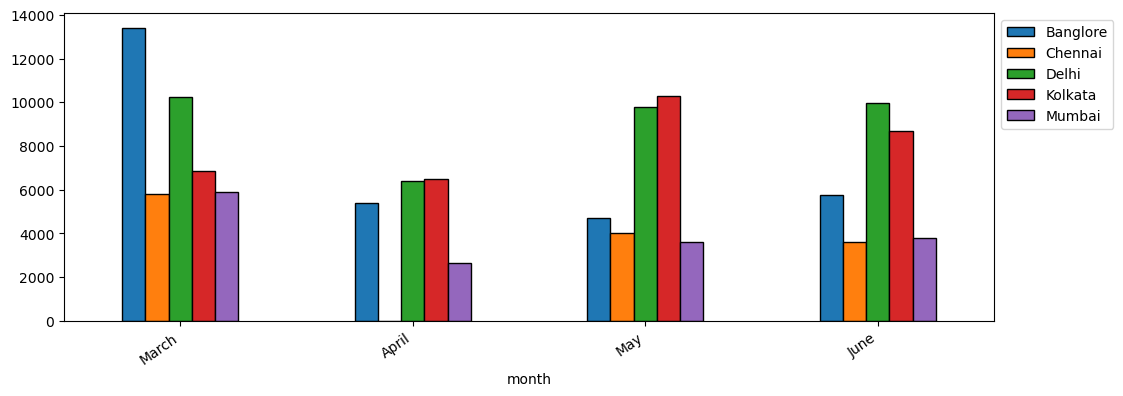

In [29]:
(
	train
	.groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
	.price.mean()
	.unstack(fill_value=0)
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(12, 4),
		edgecolor="black"
	)
)

ax = plt.gca()

ax.legend(
	loc="upper left",
	bbox_to_anchor=(1, 1)
)

eda_helper_functions.rotate_xlabels(ax)

## 8.3 dep_time

In [30]:
train.dep_time

0     2024-08-12 15:55:00
1     2024-08-12 13:25:00
2     2024-08-12 23:30:00
3     2024-08-12 14:05:00
4     2024-08-12 07:10:00
              ...        
635   2024-08-12 05:05:00
636   2024-08-12 15:15:00
637   2024-08-12 20:00:00
638   2024-08-12 17:00:00
639   2024-08-12 22:10:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

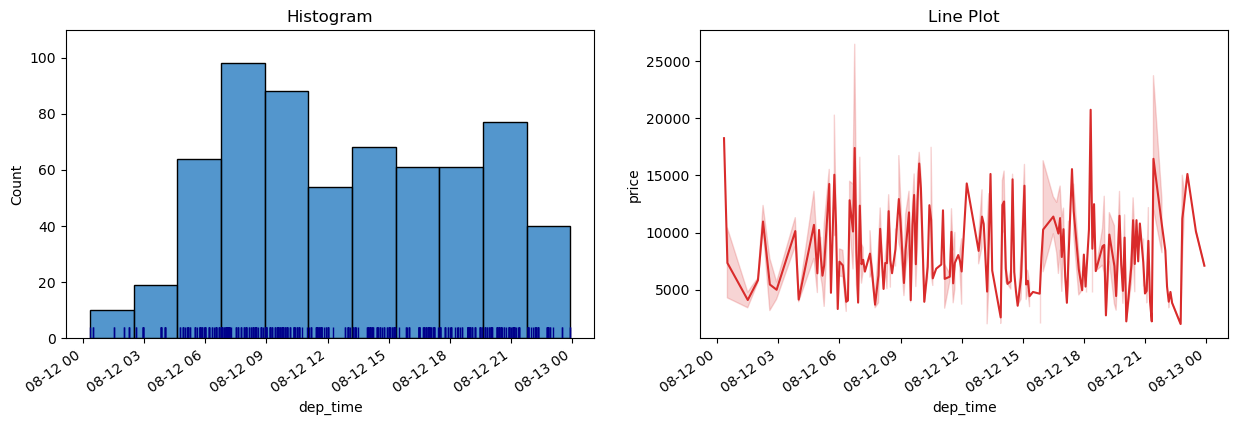

In [31]:
eda_helper_functions.dt_univar_plots(train, "dep_time", "price")

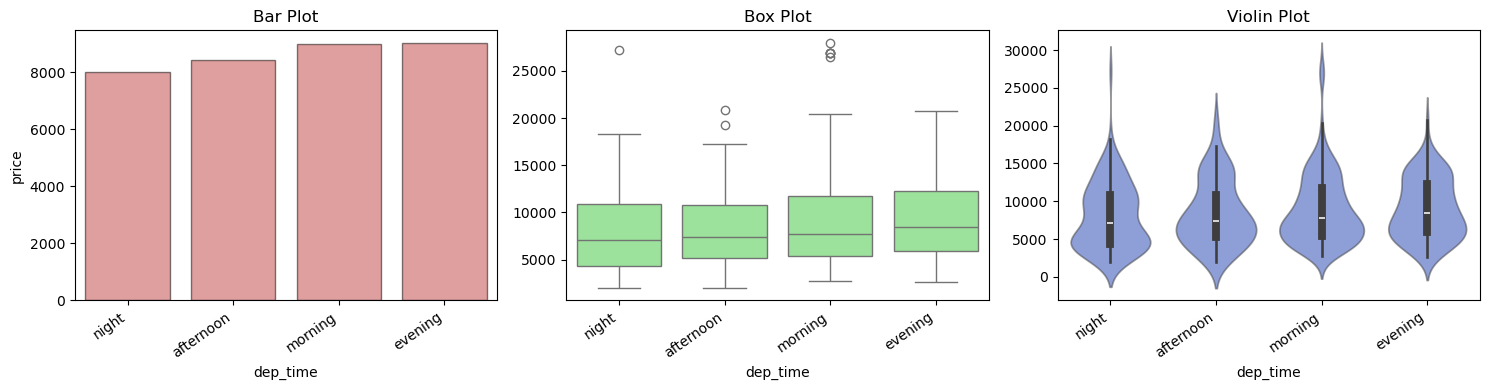

In [32]:
(
	train
	.assign(dep_time=lambda df_: (
		np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "dep_time")
)

## 8.4 duration

In [33]:
train.duration

0       330
1      1390
2       305
3      1090
4       180
       ... 
635     300
636     150
637     800
638     155
639     170
Name: duration, Length: 640, dtype: int64

In [34]:
eda_helper_functions.num_summary(train, "duration")

0       330
1      1390
2       305
3      1090
4       180
       ... 
635     300
636     150
637     800
638     155
639     170
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.00
5,90.00
10,140.00
25,170.00
50,482.50
75,876.25
90,1415.50
95,1570.00
99,1793.05


,value
mean,602.960938
trimmed mean (5%),569.435764
trimmed mean (10%),539.912109
median,482.500000


,value
var,233320.287987
std,483.032388
IQR,706.250000
mad,317.500000
coef_variance,0.801101


,value
skewness,0.911920
kurtosis,-0.068526


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 1.5343463251228825e-21
Test Statistic       : 0.883346676826477
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 24.246447682789153
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [35]:
train.duration.quantile([0.25, 0.5, 0.75])

0.25    170.00
0.50    482.50
0.75    876.25
Name: duration, dtype: float64

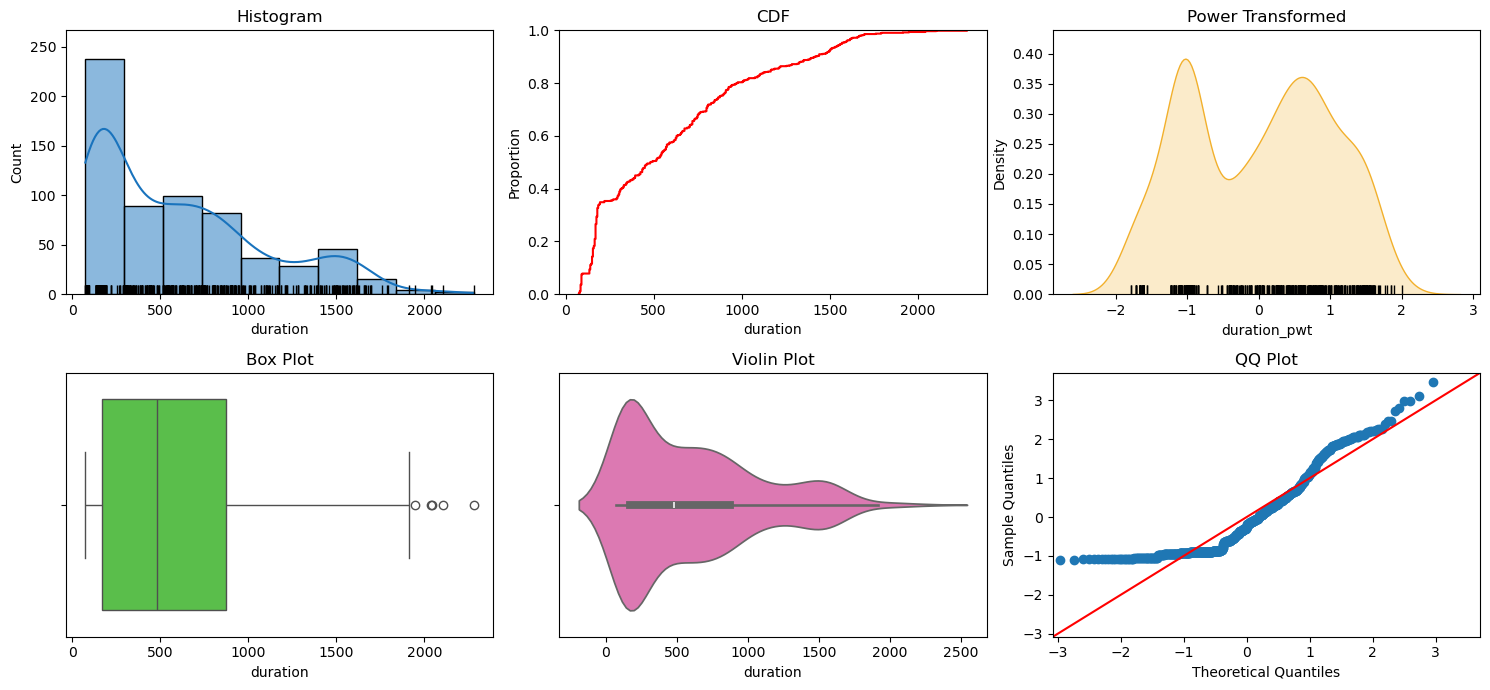

In [36]:
eda_helper_functions.num_univar_plots(train, "duration")

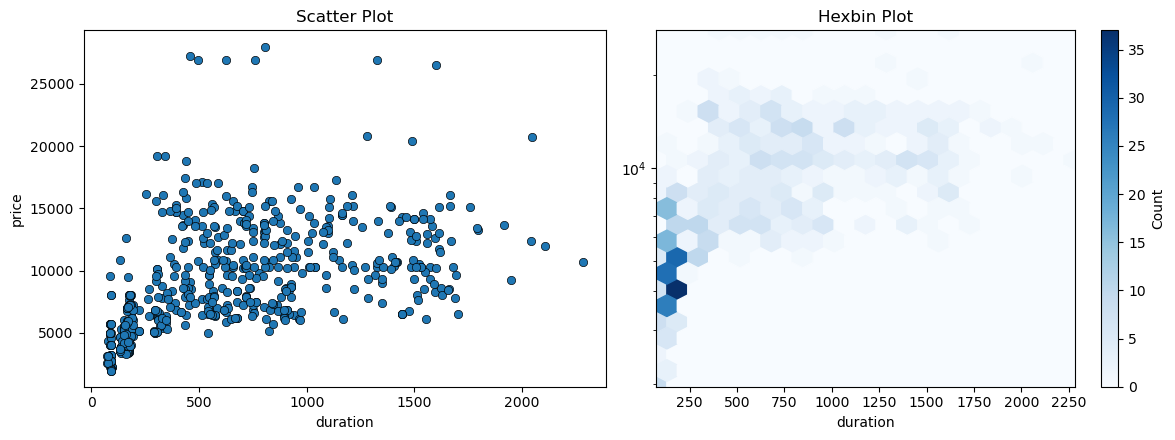

In [37]:
eda_helper_functions.num_bivar_plots(
	train,
	"duration",
	"price",
	hexbin_kwargs=dict(
		yscale="log",
		gridsize=20,
		cmap="Blues"
	)
)

In [38]:
eda_helper_functions.num_num_hyp_testing(train, "price", "duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5528354333893494
- p-value              : 1.6724123993235765e-52
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.7274113224184411
- p-value              : 1.964346022464669e-106
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


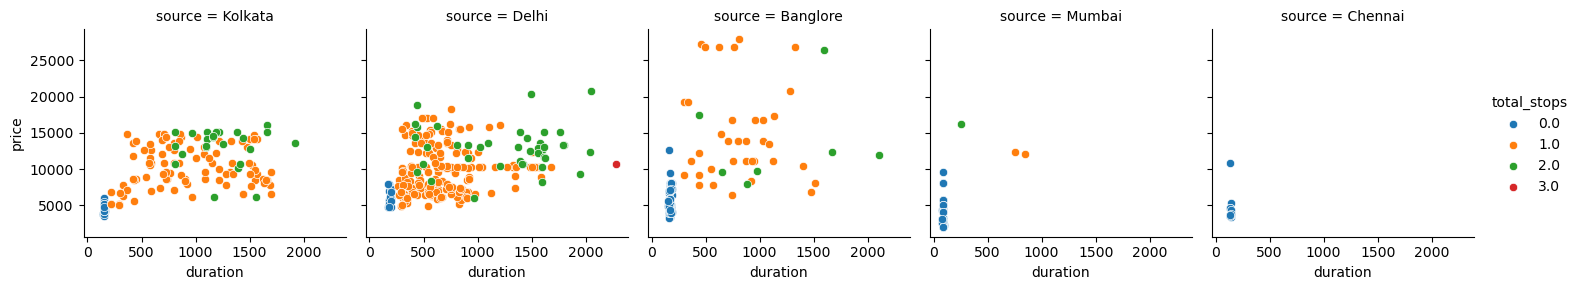

In [39]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

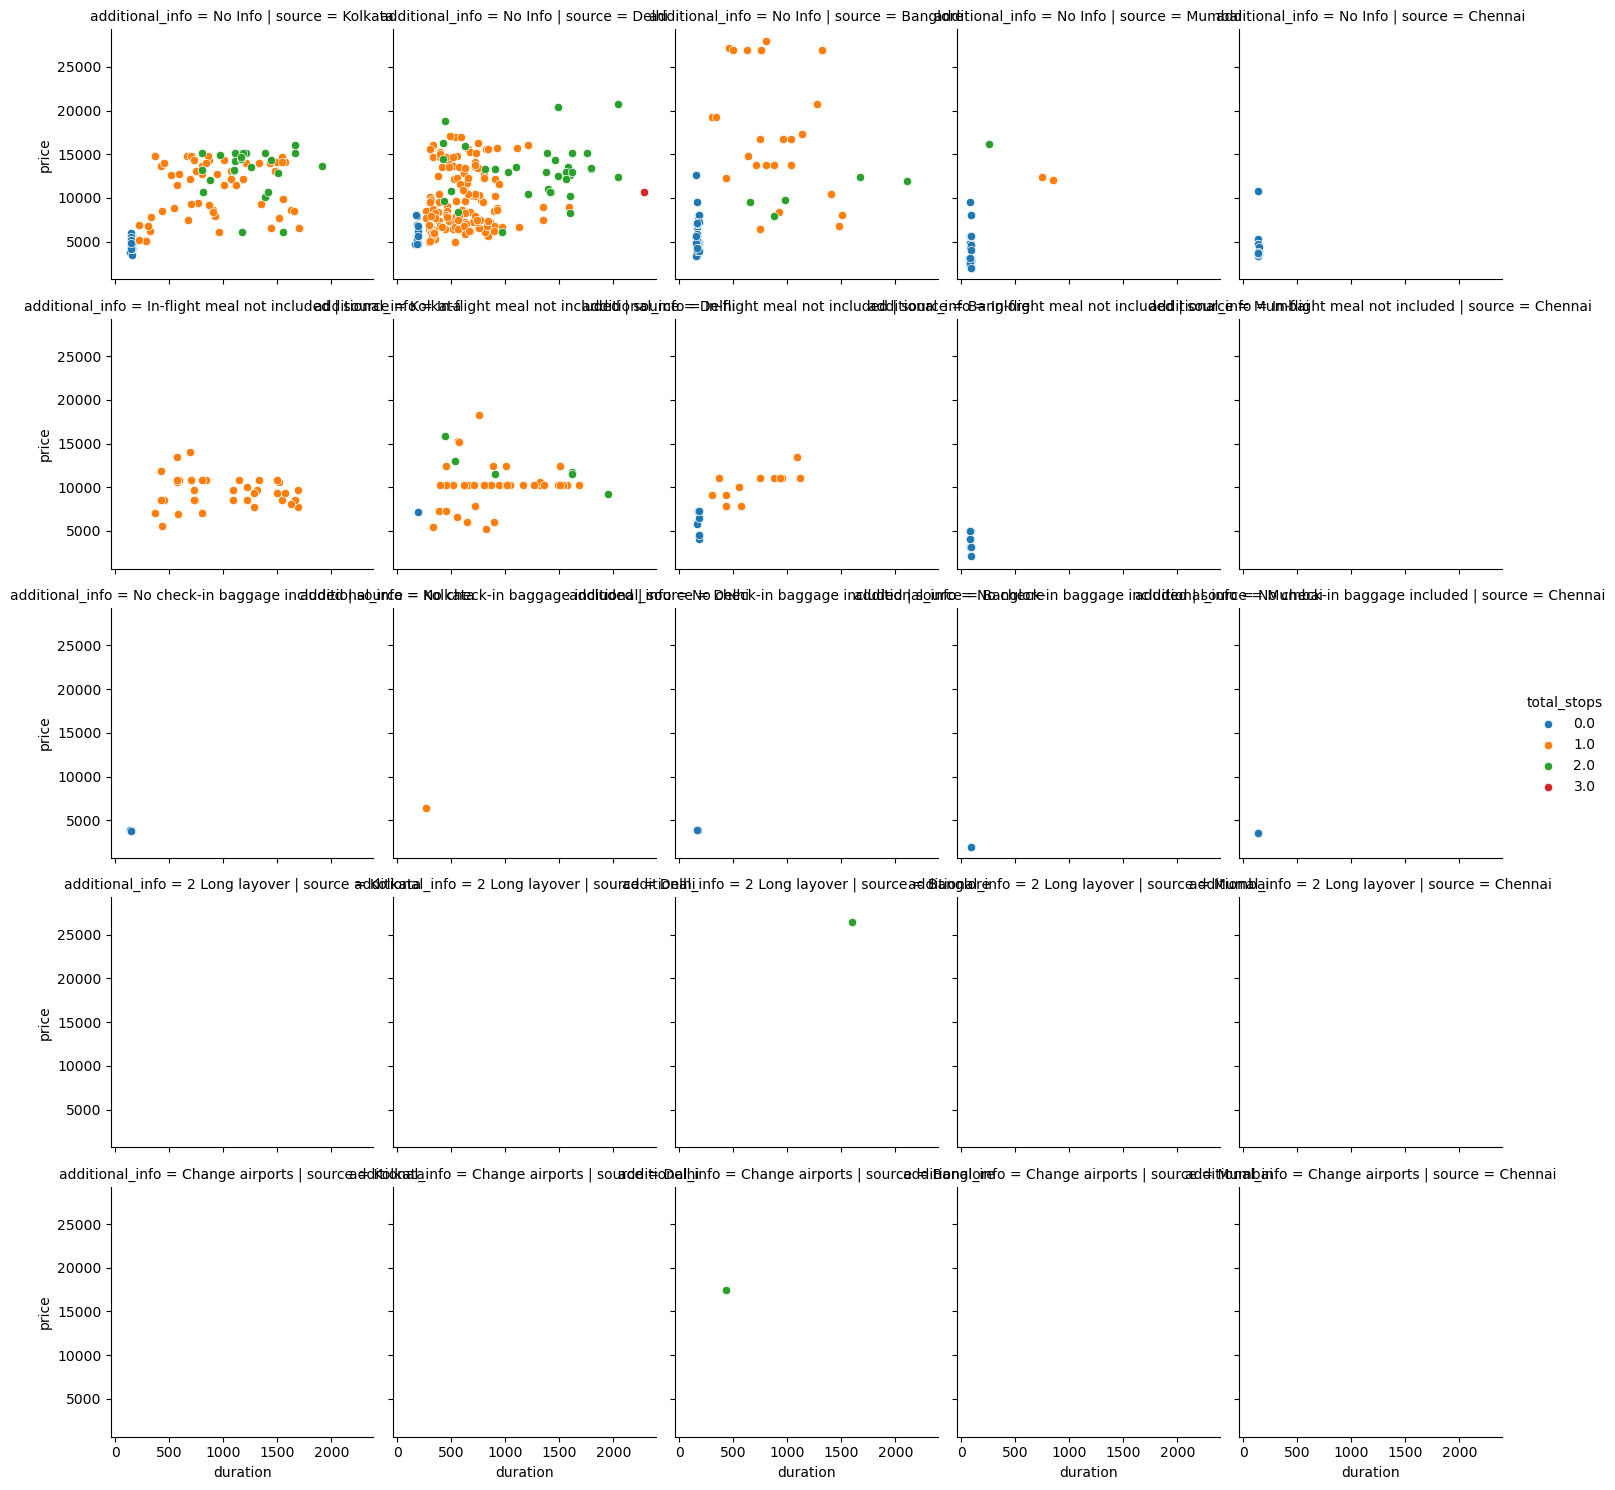

In [40]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	row="additional_info",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

In [41]:
eda_helper_functions.get_iqr_outliers(train, "duration")

Lower Limit : -889.375
Upper Limit : 1935.625


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
37,Jet Airways,2019-03-21,Delhi,Cochin,2024-08-12 10:20:00,2024-08-12 18:50:00,1950,2.0,In-flight meal not included,9254
404,Jet Airways,2019-03-21,Delhi,Cochin,2024-08-12 18:25:00,2024-08-12 04:25:00,2040,2.0,No Info,12347
409,Jet Airways,2019-03-03,Delhi,Cochin,2024-08-12 18:20:00,2024-08-12 04:25:00,2045,2.0,No Info,20747
72,Air India,2019-03-03,Banglore,New Delhi,2024-08-12 11:05:00,2024-08-12 22:10:00,2105,2.0,No Info,11948
368,Air India,2019-06-15,Delhi,Cochin,2024-08-12 05:15:00,2024-08-12 19:15:00,2280,3.0,No Info,10703


## 8.5 additional_info

In [42]:
eda_helper_functions.cat_summary(train, "additional_info")

0                          No Info
1                          No Info
2                          No Info
3      In-flight meal not included
4      In-flight meal not included
                  ...             
635                        No Info
636                        No Info
637    In-flight meal not included
638                        No Info
639                        No Info
Name: additional_info, Length: 640, dtype: object

Data Type      : object
Cardinality    : 5 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,5
top,No Info
freq,508


,count,percentage
category,,
No Info,508,0.793750
In-flight meal not included,114,0.178125
No check-in baggage included,16,0.025000
2 Long layover,1,0.001563
Change airports,1,0.001563


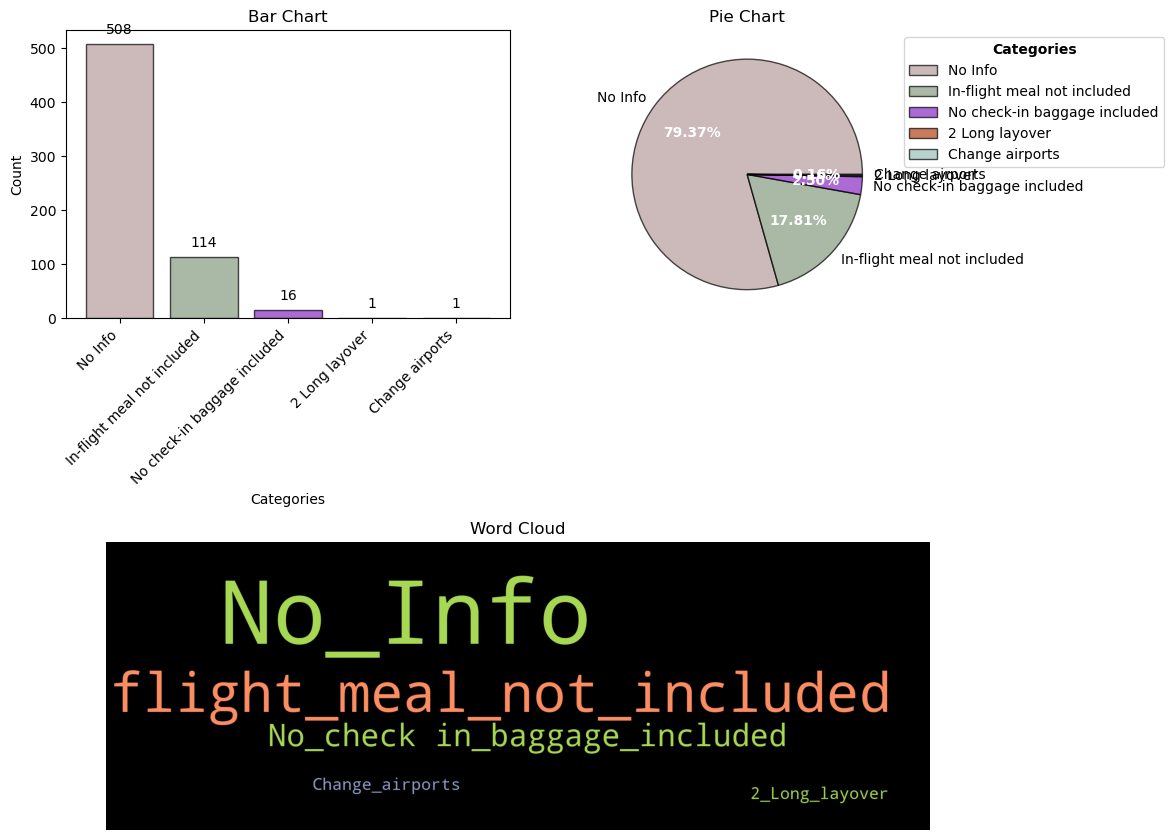

In [43]:
eda_helper_functions.cat_univar_plots(train, "additional_info")

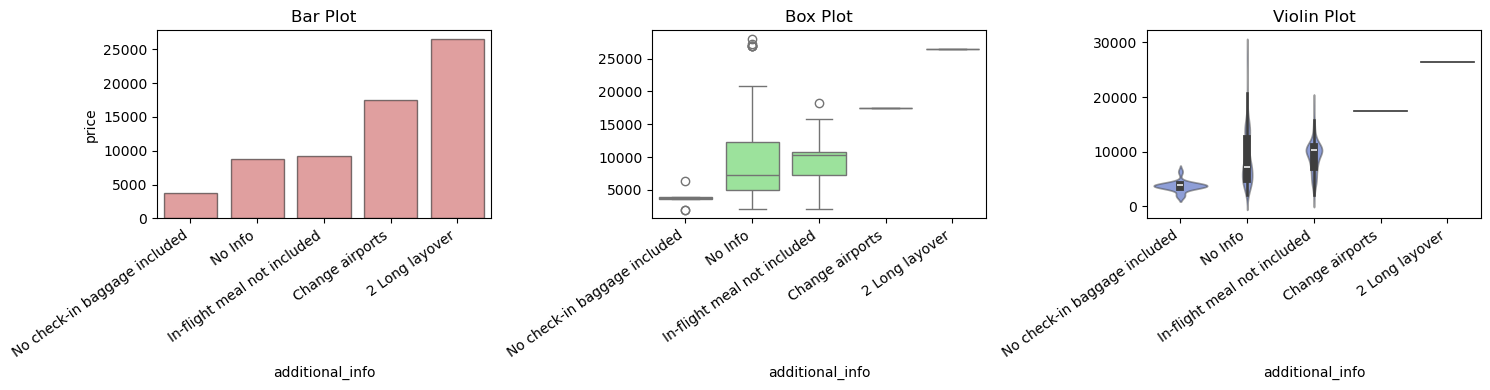

In [44]:
eda_helper_functions.num_cat_bivar_plots(train, "price", "additional_info")

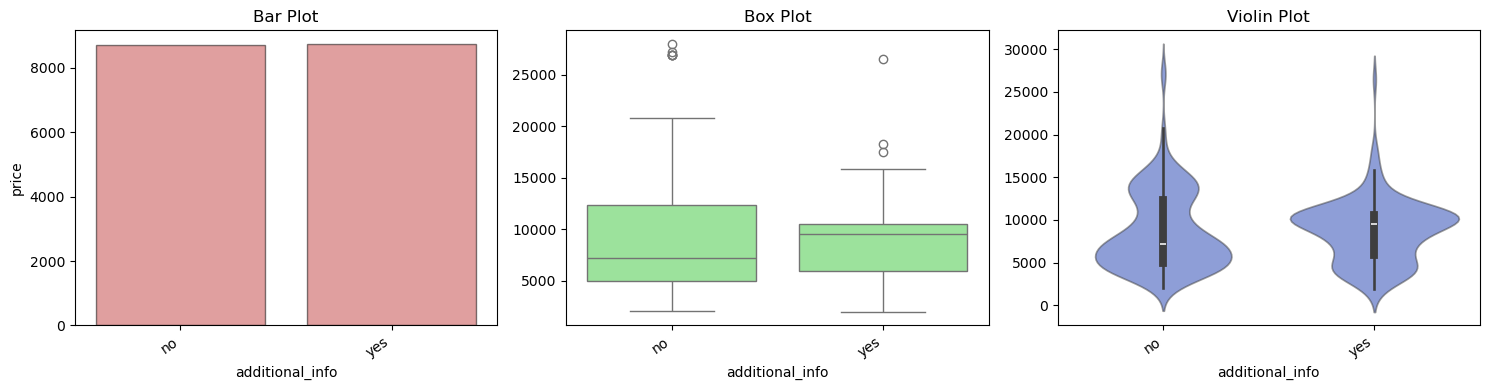

In [45]:
# convertion additional_info into a binary feature for analysis

(
	train
	.assign(additional_info=(
		train
		.additional_info
		.pipe(lambda ser: np.where(ser.eq("No Info"), "no", "yes"))
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "additional_info")
)

## 9. Automated EDA

In [46]:
# from ydata_profiling import ProfileReport
# report = ProfileReport(train)
# report.to_file(output_file="output.html")